In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [116]:
data = pd.read_csv('3DSC_MP.csv', header=1)
# рассматриваю только количественные признаки
data1 = data.loc[data['tc'] < 10.0]
data2 = data1[['formula_similarity', 'formula_frac', 'num_elements_sc', 'lata_2', 'latb_2', 'latc_2', 'band_gap_2', 'density_2',
               'e_above_hull_2', 'efermi_2', 'encut_2', 'final_energy_2', 'final_energy_per_atom_2', 'formation_energy_per_atom_2',
               'monoclinic', 'orthorhombic', 'tetragonal', 'triclinic',	'trigonal', 'primitive', 'base-centered', 'body-centered', 'face-centered', 'weight']]

# разбиваю датасет на обучающую и тестовую выборку
x_train = data2.iloc[:4000]
x_test = data2.iloc[4000:]

y_train = data1.iloc[:4000,7]
y_test = data1.iloc[4000:, 7]

In [117]:
# обучаю модель
lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)

In [124]:
# вычисляю ошибку
print("Mean squared error: %.2f" % mean_squared_error(y_test, predictions))
print('Variance score: %.2f' % r2_score(y_test, predictions))

Mean squared error: 5.59
Variance score: 0.11


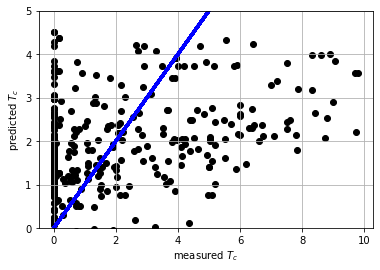

In [123]:
# строю график
fig, ax = plt.subplots()
plt.scatter(y_test, predictions, color='black')
plt.plot(y_test, y_test, color='blue', linewidth = 3)

ax.grid()

ax.set_xlabel('measured $T_c$')
ax.set_ylabel('predicted $T_c$')

plt.ylim((0, 5))
plt.show()